# DAT210x - Programming with Python for DS

## Module2 - Lab2

In [1]:
# Import and alias Pandas
import pandas as pd

In [4]:
import pandas as pd

df = pd.DataFrame([[1, 2, 3], [4, None, None], [None, None, 9]])
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,NaN,NaN
2,NaN,NaN,9.0


In [5]:
df = df.fillna(method='ffill',limit=1)
df

,0,1,2
0,1.0,2.0,3.0
1,4.0,2.0,3.0
2,4.0,NaN,9.0


Write code below to load up the `tutorial.csv` dataset. You can store it into a variable called df:

In [6]:
df=pd.read_csv('../Module1/tutorial.csv', sep=',')

Now that your dataset has been loaded, invoke the `.describe()` method to display some results about it:

In [23]:
df.describe()

,col0,col1,col2,col3
count,4.000000,4.000000,4.000000,4.000000
mean,-0.047068,-0.550656,0.409203,-0.447672
std,1.029715,0.701720,0.723956,1.300815
min,-1.062870,-1.330682,-0.238536,-1.649853
25%,-0.807875,-0.880830,-0.143055,-1.475916
50%,-0.142899,-0.617291,0.283070,-0.592780
75%,0.617907,-0.287118,0.835328,0.435464
max,1.160396,0.362640,1.309208,1.044722


In [23]:
df

,col0,col1,col2,col3
0,-0.722876,-1.330682,1.309208,0.232378
1,1.160396,-0.730879,0.677368,1.044722
2,-1.062870,-0.503704,-0.238536,-1.417937
3,0.437078,0.362640,-0.111228,-1.649853


In [7]:
df.iloc[[0, 1], [2,3]]

,col2,col3
0,1.309208,0.232378
1,0.677368,1.044722


In [8]:
df.iloc[0:2, 2:4]

,col2,col3
0,1.309208,0.232378
1,0.677368,1.044722


In [22]:
df.loc[0:1, ["col2"]]

,col2
0,1.309208
1,0.677368


In [16]:
df[0:2]

,col0,col1,col2,col3
0,-0.722876,-1.330682,1.309208,0.232378
1,1.160396,-0.730879,0.677368,1.044722


Lastly, try experimenting with indexing. Figure out which _indexing method_ you would need to use in order to index your dataframe with: `[2:4, 'col3']`. Finally, display the results:

In [19]:
df.loc[2:4,"col3"]

2   -1.417937
3   -1.649853
Name: col3, dtype: float64

In [16]:
df.loc[2:4,["col3"]]

,col3
2,-1.417937
3,-1.649853


In [25]:
df.iloc[2:4,[3]]

,col3
2,-1.417937
3,-1.649853


In [29]:
len(df.col3[df.col3>-1.5])

3

In [26]:
df.iloc[2:4,[3]]<-1.5

,col3
2,False
3,True


In [44]:
df[df.col3<-1.5]

,col0,col1,col2,col3
3,0.437078,0.36264,-0.111228,-1.649853


In [26]:
df[(df.col3<-1.5) & (df.col1>0)]#or

,col0,col1,col2,col3
3,0.437078,0.36264,-0.111228,-1.649853


In [47]:
df[(df.col3<-1.5) & (df.col1>0)]=0
df

,col0,col1,col2,col3
0,-0.722876,-1.330682,1.309208,0.232378
1,1.160396,-0.730879,0.677368,1.044722
2,-1.062870,-0.503704,-0.238536,-1.417937
3,0.000000,0.000000,0.000000,0.000000


Textual Categorical-Features

In [53]:
ordered_satisfaction = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']
df = pd.DataFrame({'satisfaction':['Mad', 'Happy', 'Unhappy', 'Neutral']})
df.satisfaction = df.satisfaction.astype("category",ordered=True,categories=ordered_satisfaction).cat.codes#cat.codes assign -1 to not found in catagory list

In [54]:
df

,satisfaction
0,-1
1,3
2,1
3,2


In [57]:
df = pd.DataFrame({'vertebrates':[
...  'Bird',
...  'Bird',
...  'Mammal',
...  'Fish',
...  'Amphibian',
...  'Reptile',
...  'Mammal',
... ]})
df['vertebrates'] = df.vertebrates.astype("category").cat.codes#Pandas automatically encodes your nominal entries in alphabetical order

In [58]:
df

,vertebrates
0,1
1,1
2,3
3,2
4,0
5,4
6,3


In [59]:
df = pd.DataFrame({'vertebrates':[
...  'Bird',
...  'Bird',
...  'Mammal',
...  'Fish',
...  'Amphibian',
...  'Reptile',
...  'Mammal',
... ]})
df = pd.get_dummies(df,columns=['vertebrates'])

In [60]:
df

,vertebrates_Amphibian,vertebrates_Bird,vertebrates_Fish,vertebrates_Mammal,vertebrates_Reptile
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,1,0,0,0,0
5,0,0,0,0,1
6,0,0,0,1,0


In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
corpus = [
...  "Authman ran faster than Harry because he is an athlete.",
...  "Authman and Harry ran faster and faster.","nur ein"
... ]

In [78]:
corpus

['Authman ran faster than Harry because he is an athlete.',
 'Authman and Harry ran faster and faster.',
 'nur ein']

In [79]:
bow = CountVectorizer()
X = bow.fit_transform(corpus) # Sparse Matrix

In [81]:
bow.get_feature_names()

['an',
 'and',
 'athlete',
 'authman',
 'because',
 'ein',
 'faster',
 'harry',
 'he',
 'is',
 'nur',
 'ran',
 'than']

In [82]:
X.toarray()

array([[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
       [0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [105]:
from scipy import misc
# Load the image up
img = misc.imread('../Images/py36.png')
type(img)

numpy.ndarray

In [106]:
img.shape

(300, 300, 4)

In [107]:
# Is the image too big? Resample it down by an order of magnitude
img = img[::2, ::2]

In [108]:
img.shape

(150, 150, 4)

In [109]:
# Scale colors from (0-255) to (0-1), then reshape to 1D array per pixel, e.g. grayscale
# If you had color images and wanted to preserve all color channels, use .reshape(-1,3)
X = (img / 255.0).reshape(-1,4)#red green blue alpha

In [111]:
red=X[:,0]
green=X[:,1]
blue=X[:,2]

In [112]:
gray=0.299*red+0.597*green+0.114*blue

In [113]:
gray.shape

(22500,)

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': 'one one two one two two one one'.split(), 'D': np.arange(8) * 2})
print(df)

     A      B    C   D
0  foo    one  one   0
1  bar    one  one   2
2  foo    two  two   4
3  bar  three  one   6
4  foo    two  two   8
5  bar    two  two  10
6  foo    one  one  12
7  foo  three  one  14


In [18]:
df1 = df[~(df['C'].isin(["one","two"]) & df['D'].isin([0])) & ~ (df['C'].isin(["one","two"]) & df['B'].isin(["one"])) ]
df1


,A,B,C,D
2,foo,two,two,4
3,bar,three,one,6
4,foo,two,two,8
5,bar,two,two,10
7,foo,three,one,14


In [20]:
df2 = df[(df['C'].isin(["one","two"]) & df['D'].isin([0])) |  (df['C'].isin(["one","two"]) & df['B'].isin(["one"])) ]
df2


,A,B,C,D
0,foo,one,one,0
1,bar,one,one,2
6,foo,one,one,12


In [1]:
import matplotlib.pyplot as plt
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend(handles=[line_up, line_down])
plt.show()

<Figure size 640x480 with 1 Axes>

(-20, 40)

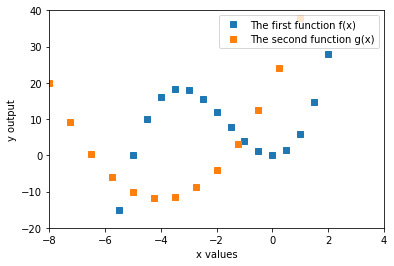

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
     return x**3 + 5 * x**2


def g(x):
     return 2 * (x+4)**2 - 12


# Create a numpy array of x values.
x = np.arange(-50, 50, 0.5)

# Define empty lists and loop over x to fill the lists.
y1 = []
y2 = []
for i in x:
     result1 = f(i)
     y1.append(result1)
     
 # Plotting.
plt.figure(4)
plt.plot(x, y1,"s")
x = np.arange(-50, 50, 0.75)
for i in x:
     
     result2 = g(i)
     y2.append(result2)

plt.plot(x, y2,"s")
plt.xlabel("x values")
plt.ylabel("y output")
plt.legend(["The first function f(x)", "The second function g(x)"], loc='upper right')
plt.xlim(-8, 4) 
plt.ylim(-20, 40)